In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [50]:
def RSV_factor(df, window=18):
    """
    计算RSV因子：过去d天的价格在上下阻力价格之间的位置
    RSV = (close - min(low, d)) / (max(high, d) - min(low, d) + 1e-12)
    
    参数:
    df: 包含OHLC数据的DataFrame
    window: 时间窗口大小 (d)
    """
    # 计算滚动窗口内的最低价
    min_low = df['low'].rolling(window).min()
    
    # 计算滚动窗口内的最高价
    max_high = df['high'].rolling(window).max()
    
    # 计算分母（添加1e-12避免除零错误）
    denominator = max_high - min_low + 1e-12
    
    # 计算RSV因子
    rsv = (df['close'] - min_low) / denominator
    
    return rsv

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.011492
   Rank_IC (Spearman): -0.027835
📊 信息比率:
   IR: -0.580154
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130769
   因子列: RSV_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


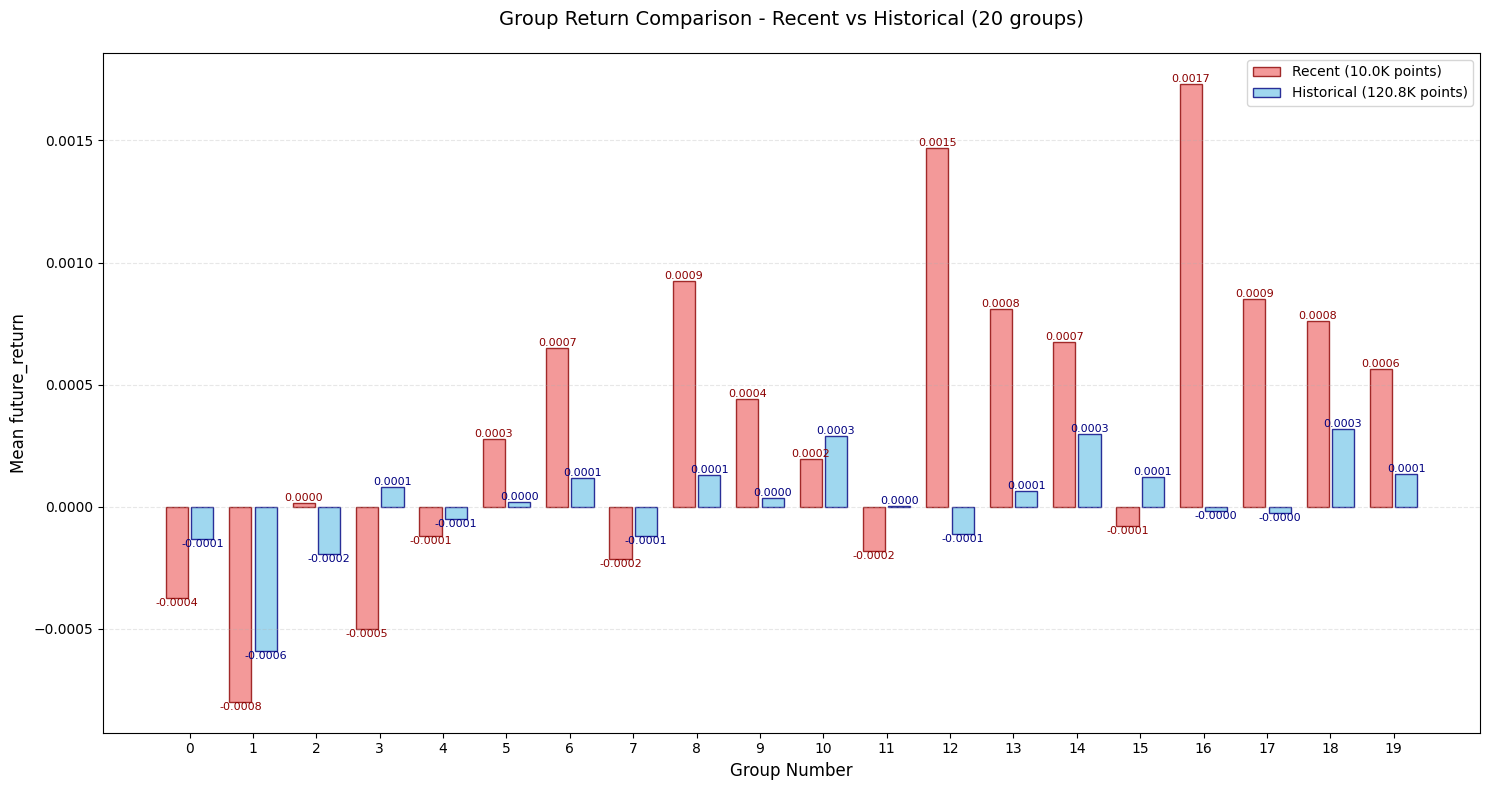

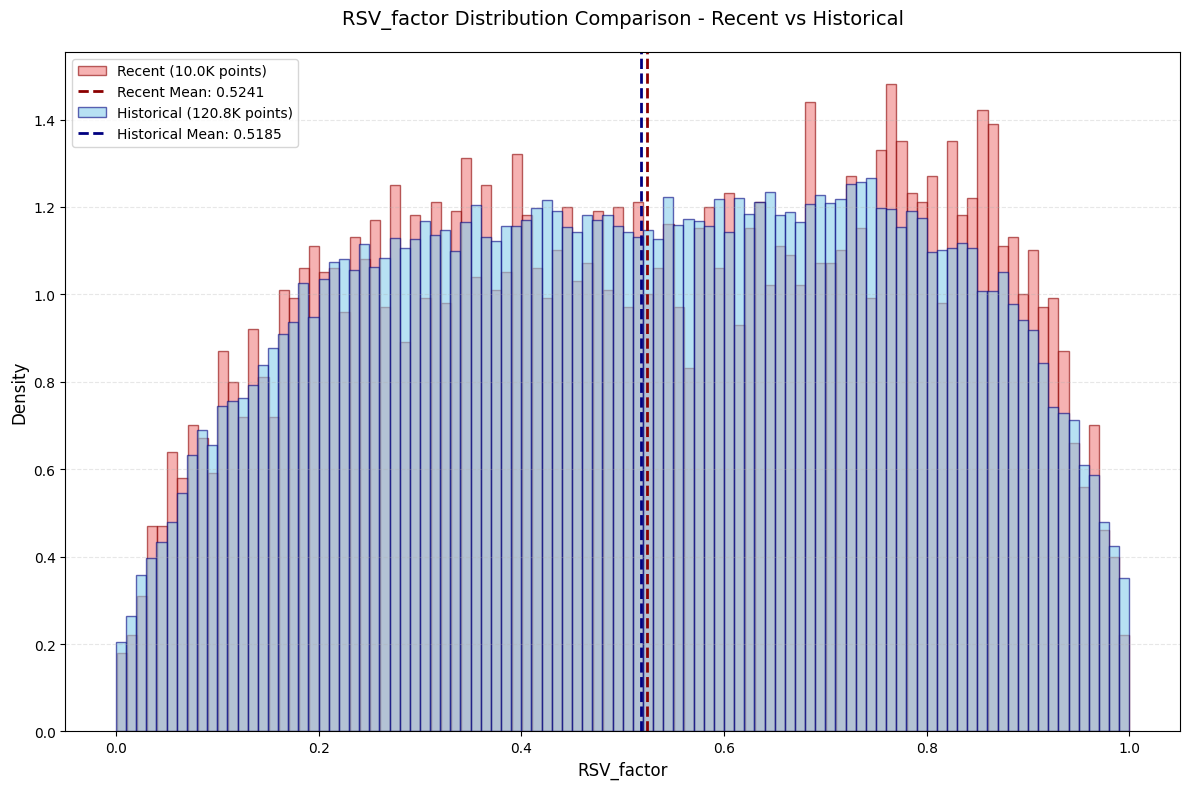

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [51]:
evaluator.set_factor(
    factor_func=RSV_factor,
    factor_name='RSV_factor'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

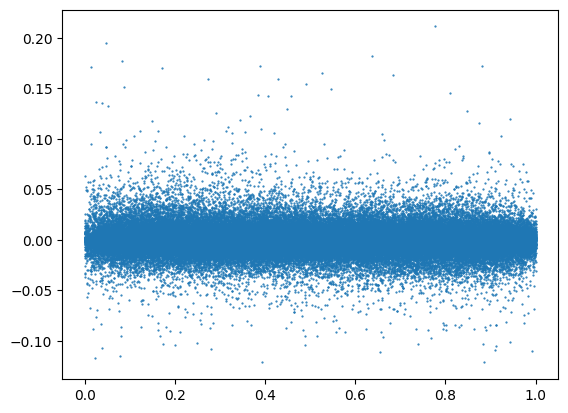

In [52]:
import matplotlib.pyplot as plt
plt.scatter(RSV_factor(df),df['close'].pct_change(-10), s=0.3)

In [53]:
result['information_ratio']['group_correlations']

[-0.01674468092004749,
 0.008461510275687239,
 0.004273655299616853,
 -0.010406316530037879,
 -0.015837130454392508,
 -0.012495667789835829,
 0.0030764653119898875,
 -0.012309719164254244,
 0.002316434919782887,
 -0.001888053328828512]

In [54]:
print(result)

{'correlation_analysis': {'IC': 0.011491839610698067, 'Rank_IC': -0.02783450686310195}, 'information_ratio': {'IR': -0.5801538530281264, 'group_correlations': [-0.01674468092004749, 0.008461510275687239, 0.004273655299616853, -0.010406316530037879, -0.015837130454392508, -0.012495667789835829, 0.0030764653119898875, -0.012309719164254244, 0.002316434919782887, -0.001888053328828512], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0       0.0000   0.1044    0.0625      -0.0002      0.0148   6539
1       0.1044   0.1662    0.1364      -0.0006      0.0131   6538
2       0.1662   0.2166    0.1918      -0.0002      0.0127   6539
3       0.2166   0.2627    0.2395       0.0000      0.0118   6538
4       0.2627   0.3074    0.2853      -0.0000      0.0122   6539
5       0.3074   0.3513    0.3294       0.0000      0.0115   6538
6       0.3513   0.3950    0.3729 